
# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

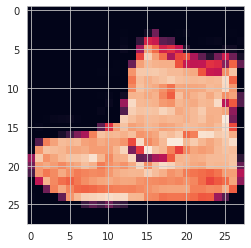

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[0]

9

In [11]:
classes[9]

'Ankle boot'

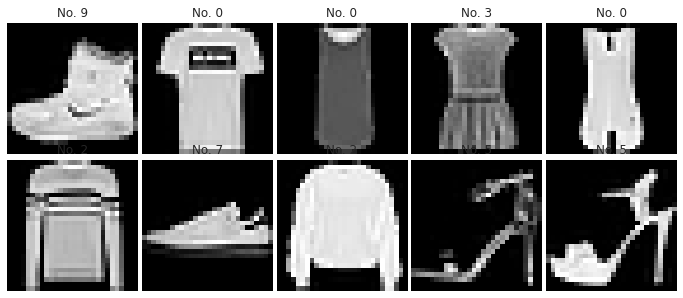

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train.min()

0

In [14]:
X_train.max()

255

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

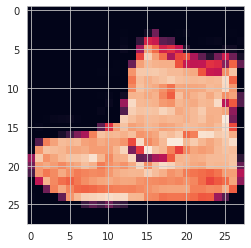

In [18]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[8]

5

In [36]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [38]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [40]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [43]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.4021 - accuracy: 0.8612 - val_loss: 0.3133 - val_accuracy: 0.8916
Epoch 2/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.2977 - accuracy: 0.8958 - val_loss: 0.3013 - val_accuracy: 0.8974
Epoch 3/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2777 - accuracy: 0.9049 - val_loss: 0.3017 - val_accuracy: 0.9012
Epoch 4/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2671 - accuracy: 0.9077 - val_loss: 0.2972 - val_accuracy: 0.9001
Epoch 5/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2612 - accuracy: 0.9105 - val_loss: 0.2943 - val_accuracy: 0.8986
Epoch 6/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2577 - accuracy: 0.9107 - val_loss: 0.3235 - val_accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2544 - accuracy: 0.9143 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.402,0.861,0.313,0.892
1,0.298,0.896,0.301,0.897
2,0.278,0.905,0.302,0.901
3,0.267,0.908,0.297,0.900
4,0.261,0.910,0.294,0.899


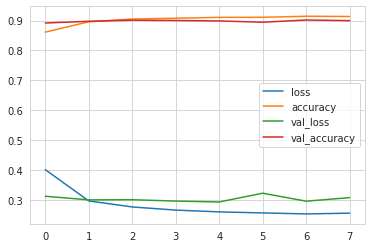

In [46]:
summary.plot();

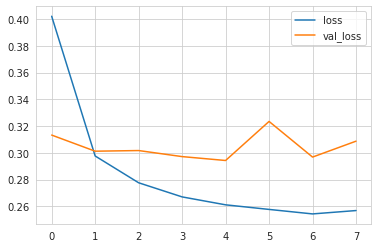

In [47]:
summary[["loss", "val_loss"]].plot();

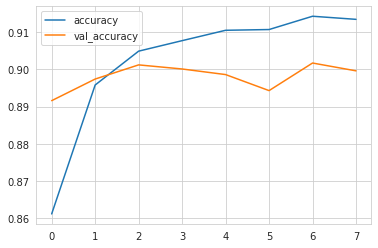

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2943 - accuracy: 0.8986


[0.29431143403053284, 0.8985999822616577]

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29431143403053284
Test accuracy: 0.8985999822616577


In [52]:
pred_prob = model.predict(X_test)
pred_prob

array([[9.1366893e-08, 3.3411361e-08, 2.0984135e-07, ..., 7.4068375e-04,
        3.4006298e-06, 9.9895620e-01],
       [5.9492983e-08, 9.0189732e-20, 9.9999988e-01, ..., 1.8185752e-14,
        1.7772139e-14, 1.4452387e-15],
       [5.7557265e-10, 1.0000000e+00, 1.0225144e-11, ..., 3.5630795e-13,
        4.1588091e-10, 1.9617786e-14],
       ...,
       [1.1213069e-06, 3.5644513e-17, 1.7556163e-08, ..., 3.5065792e-10,
        9.9998069e-01, 8.5521591e-13],
       [2.9170881e-09, 9.9999952e-01, 3.0828312e-11, ..., 2.5030183e-11,
        4.9089604e-11, 2.1531403e-11],
       [3.5409636e-03, 6.0174422e-04, 8.0731539e-03, ..., 5.0474012e-01,
        6.4860091e-02, 1.9197488e-02]], dtype=float32)

In [53]:
pred_prob.shape

(10000, 10)

In [54]:
pred_prob[0]

array([9.1366893e-08, 3.3411361e-08, 2.0984135e-07, 7.8334059e-09,
       4.0845752e-08, 2.9855163e-04, 6.7864676e-07, 7.4068375e-04,
       3.4006298e-06, 9.9895620e-01], dtype=float32)

In [55]:
np.argmax(pred_prob[0])

9

In [56]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [57]:
y_pred.shape

(10000,)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.88      0.84      1000
           3       0.87      0.93      0.90      1000
           4       0.86      0.79      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.71      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [59]:
print(confusion_matrix(y_test, y_pred))

[[852   0  16  26   8   2  93   0   3   0]
 [  3 975   2  13   2   0   5   0   0   0]
 [ 12   0 875   9  44   0  60   0   0   0]
 [ 16   3   8 932  10   0  30   0   1   0]
 [  1   1 105  46 785   0  61   0   1   0]
 [  0   0   0   0   0 967   0  26   0   7]
 [108   1  84  36  56   0 706   0   9   0]
 [  0   0   0   0   0   7   0 976   0  17]
 [  2   2   2   4   3   7  11   6 963   0]
 [  0   0   0   0   0   7   0  37   1 955]]


In [60]:
(y_test != y_pred).sum()

1014

## Prediction

In [61]:
samples=[X_test[0], X_test[1], X_test[2]]

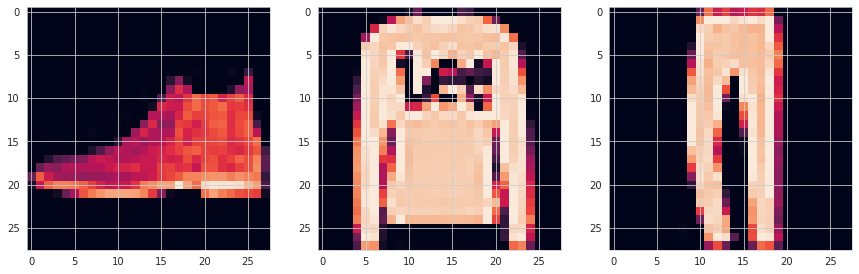

In [62]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [63]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [64]:
samples.shape

(3, 28, 28, 1)

In [65]:
pred_prob = model.predict(samples)
pred_prob

array([[9.1367070e-08, 3.3411489e-08, 2.0984135e-07, 7.8334059e-09,
        4.0845908e-08, 2.9855134e-04, 6.7864607e-07, 7.4068236e-04,
        3.4006425e-06, 9.9895620e-01],
       [5.9492873e-08, 9.0190423e-20, 9.9999988e-01, 1.2448644e-11,
        2.5684281e-08, 2.0503341e-14, 3.2645389e-08, 1.8185787e-14,
        1.7772105e-14, 1.4452387e-15],
       [5.7557370e-10, 1.0000000e+00, 1.0225144e-11, 7.4859459e-11,
        1.2993832e-09, 7.3014502e-12, 1.5844935e-10, 3.5630862e-13,
        4.1588330e-10, 1.9617973e-14]], dtype=float32)

In [66]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [67]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [69]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [68]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser
